In [2]:
using Plots
include("../ensemble.jl")
include("../exact/random_regular.jl")
include("../exact/montecarlo.jl")
import ProgressMeter; ProgressMeter.ijulia_behavior(:append);

## β=1.0
This is above the ferromagnetic transition @ $β=\tanh^{-1}\left(\frac{1}{J(k-1)}\right)\approx 0.5$

In [7]:
β = 1.0
T = 20     # final time
ε = 1e-4  # truncation error for svd   
pᵢ⁰ = [0.75, 0.25]   # initial condition: magnetization = +0.5
ϕᵢ = [ones(2) for _ in 1:T]   # observations (none)
wᵢ = fill( GlauberFactor(ones(3), 0.0, β), T )   # transition probabilities: J=1, h=0

A = mpem2(2, T, d=1)   # initialize with bonds of dimension d
Δs = zeros(0);

Run on infinite 3-regular graph

In [8]:
A, iters, Δs = iterate_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; ε, maxiter=100, tol=1e-3, Δs, verbose=true, showprogress=false);


### iter 1 of 100
Δ: 0.5000000000000002 / 0.001
bonds:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


### iter 2 of 100
Δ: 0.43916222741062433 / 0.001
bonds:	[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2]


### iter 3 of 100
Δ: 0.3503271014150907 / 0.001
bonds:	[4, 12, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 6, 2]


### iter 4 of 100
Δ: 0.27972080110806474 / 0.001
bonds:	[4, 14, 22, 26, 27, 27, 29, 30, 31, 31, 32, 32, 33, 33, 33, 32, 27, 18, 6, 2]


### iter 5 of 100
Δ: 0.2437405119970199 / 0.001
bonds:	[4, 14, 25, 30, 31, 33, 36, 37, 37, 37, 39, 38, 39, 40, 39, 37, 28, 17, 6, 2]


### iter 6 of 100
Δ: 0.22278356541893402 / 0.001
bonds:	[4, 13, 23, 28, 30, 31, 31, 32, 33, 36, 36, 36, 37, 36, 35, 33, 25, 16, 6, 2]


### iter 7 of 100
Δ: 0.17715009417164151 / 0.001
bonds:	[4, 12, 22, 26, 27, 29, 29, 29, 29, 30, 30, 31, 30, 31, 30, 28, 22, 15, 6, 2]


### iter 8 of 100
Δ: 0.11468140024507356 / 0.001
bonds:	[4, 13, 20, 24, 25, 25, 25, 

In [ ]:
mag = magnetization_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; ε);

Computing belief  11%|███▋                               |  ETA: 0:03:01
4m  t:  2/20
Computing belief  16%|█████▌                             |  ETA: 0:10:28
4m  t:  3/20
Computing belief  21%|███████▍                           |  ETA: 0:17:27
4m  t:  4/20
Computing belief  26%|█████████▎                         |  ETA: 0:19:14
4m  t:  5/20
Computing belief  32%|███████████                        |  ETA: 0:18:24
4m  t:  6/20
Computing belief  37%|████████████▉                      |  ETA: 0:16:56
4m  t:  7/20
Computing belief  42%|██████████████▊                    |  ETA: 0:14:53
4m  t:  8/20
Computing belief  47%|████████████████▋                  |  ETA: 0:12:47
4m  t:  9/20
Computing belief  53%|██████████████████▍                |  ETA: 0:10:52
4m  t:  10/20
Computing belief  58%|████████████████████▎              |  ETA: 0:09:08
4m  t:  11/20
Computing belief  63%|██████████████████████▏            |  ETA: 0:07:27
4m  t:  12/20
Computing belief  68%|████████████████████████     

Compute RS equilibrium prediction

In [ ]:
k = 3
J = 1.0
m_eq = rs_magnetization_fixedpoints(β, J, k) 

In [ ]:
p1 = plot(0:T, mag, title="T=$T, β=$β, ε=$ε", xlabel="time", label="MPdBP",
    ylabel="magnetiz", m=:o, titlefontsize=12, xticks=0:2:T)
hline!(p1, [m_eq[3]], ls=:dash, label="RS @equilibrium", legend=:bottomright)
p2 = plot(Δs, xlabel="time", ylabel="convergence error", 
    m=:o, label="", yaxis=:log10)
p3 = plot(p1, p2, layout=(2,1), size=(500,500))

As it should be:

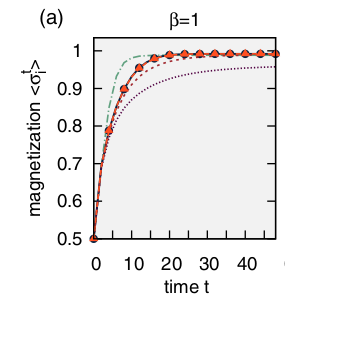